In [1]:
# %matplotlib qt
import pickle
import os
from pylab import *
import math

In [2]:
def store(data, name):
    with open('./map_windows/'+name+'.p','wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

def loadFile(name):
    with open(name,"rb") as f:
        return pickle.load(f)

In [3]:
G = loadFile('../0_map_data_processed/edges_list.p')
nodexy = loadFile('../0_map_data_processed/node_xy.p')
nodell = loadFile('../0_map_data_processed/node_ll.p')

In [4]:
Xs = []; Ys = []
for k in nodexy:
    Xs.append(nodexy[k][0])
    Ys.append(nodexy[k][1])

In [5]:
range_x = int(max(Xs)-min(Xs))+10
range_y = int(max(Ys)-min(Ys))+10
print('length of x axis :',range_x)
print('length of y axis :',range_y)
x_offset = int(min(Xs))-10
y_offset = int(min(Ys))-10
print('x_offset = ',x_offset)
print('y_offset = ',y_offset)

length of x axis : 50352
length of y axis : 20134
x_offset =  1310877
y_offset =  6057984


*

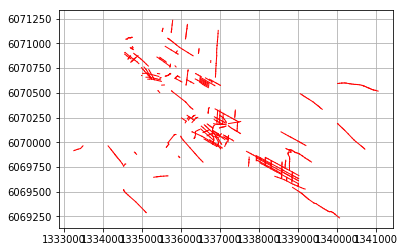

In [6]:
j = 0
for edge in G[2000:3000]:
    if(j % 10000 == 0):
        print('*',end='')
    x1,y1 = nodexy[edge[0]]
    x2,y2 = nodexy[edge[1]]
    plot([x1,x2],[y1,y2],'-r',linewidth=1)
    j += 1
grid()
show()

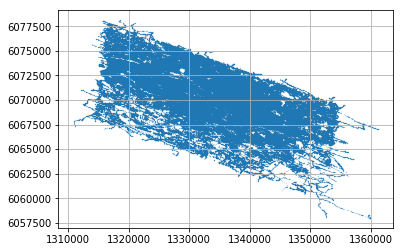

In [7]:
scatter(Xs,Ys,s=0.01)
grid()
show()

In [9]:
windows = {}
for edge in G:
    x,y = map(int,nodexy[edge[0]])
    x_grid = (x-x_offset)//200
    y_grid = (y-y_offset)//200
    code = str(x_grid)+'_'+str(y_grid)
    if(code not in windows):
        windows[code] = []
    windows[code].append(edge)

In [10]:
filelist = [ f for f in os.listdir('map_windows') ]
for f in filelist:
    os.remove(os.path.join('map_windows', f))

In [11]:
for code in windows:
    store(windows[code],'w_'+code)
store(windows,'windows')

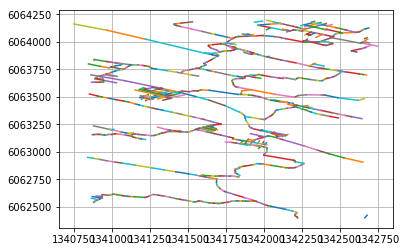

In [12]:
# for code in windows:
for s in range(150,159,1):
    for p in range(22,31,1):
        code = str(s)+'_'+str(p)
        if(code not in windows):
            continue
        for edge in windows[code]:
            plot([nodexy[edge[0]][0],nodexy[edge[1]][0]],[nodexy[edge[0]][1],nodexy[edge[1]][1]])
grid()
show()

### Checking if above result matches with original $osm$ map

In [13]:
stx = 150*200 + x_offset
sty = 22*200 + y_offset
enx = 160*200 + x_offset
eny = 32*200 + y_offset
R = 6378000
def ll(x,y):
    lat = math.acos(math.sqrt((x**2+y**2)/(R**2)))
    lon = math.acos(x/(cos(lat)*R))
    lat *= (180/pi); lon *= (180/pi)
    return lat,lon
print(ll(stx,sty))
print(ll(enx,eny))

(13.223006135984063, 77.52811950348217)
(13.129015689231487, 77.51409017051405)


Yes, it matches !!

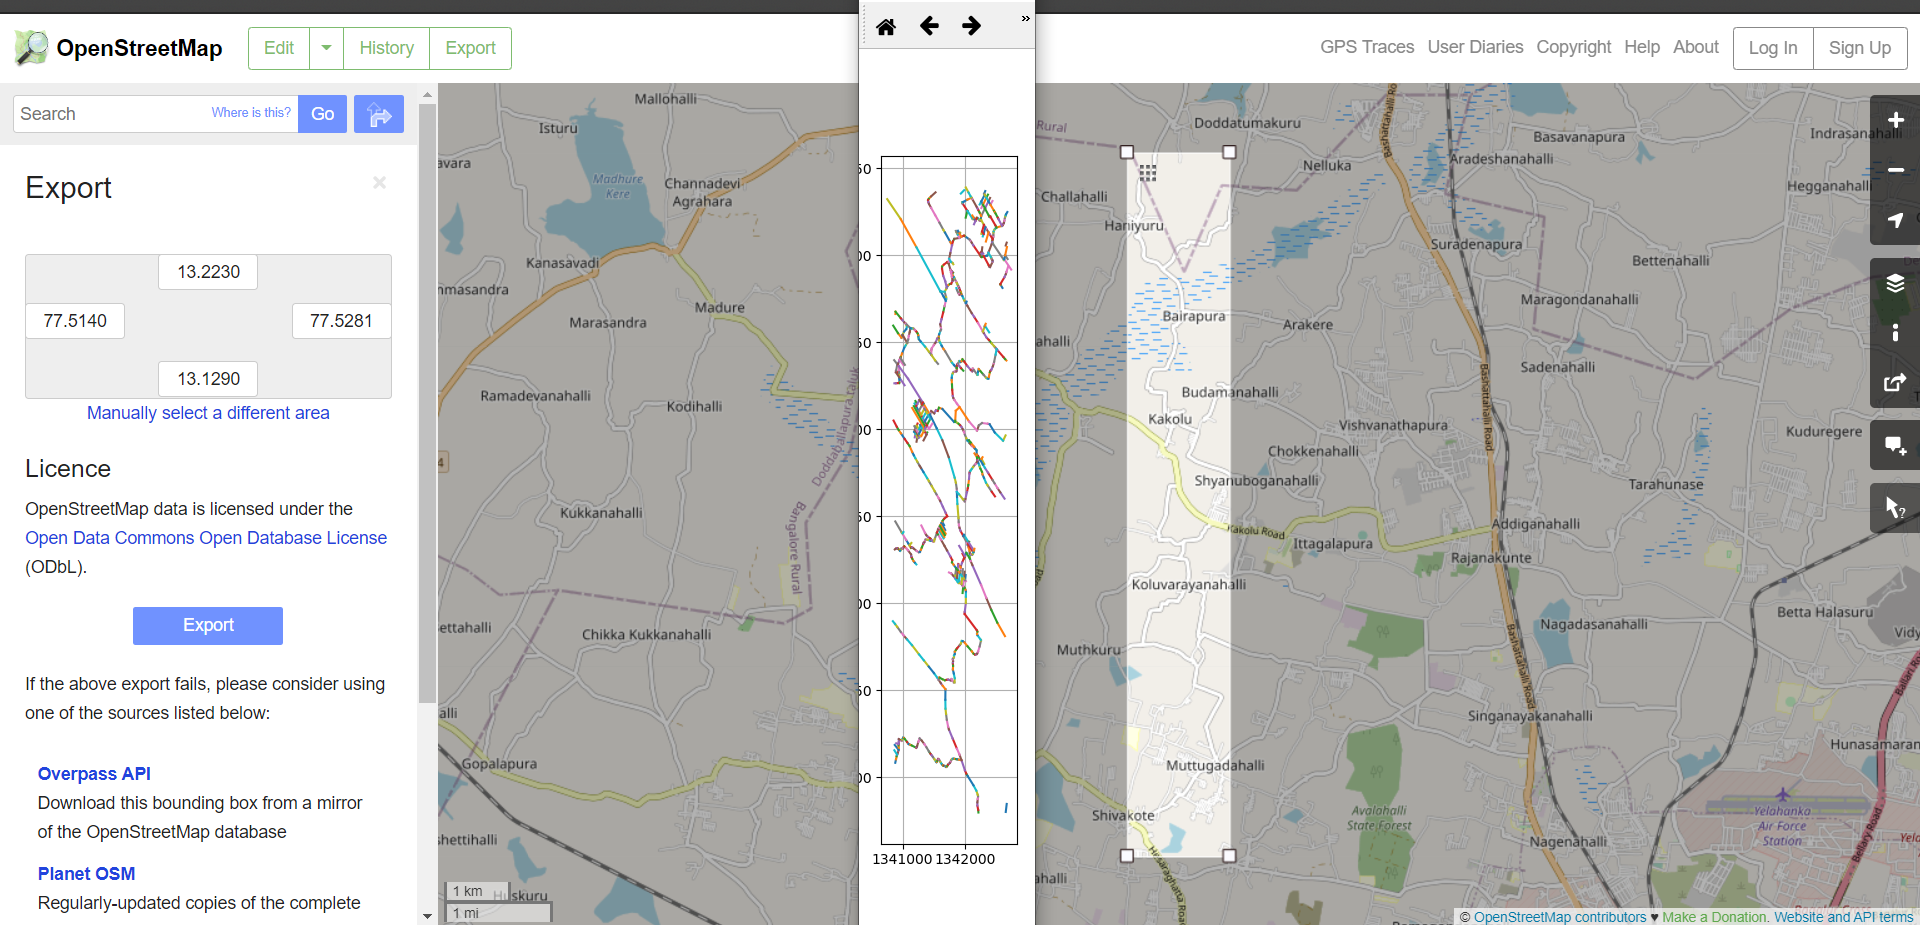